In [1]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
basePath ='./sims.TNG/TNG50-1/output'

main_subhalo_id=329508
main_halo_id=23

problem_snapshots=[64,67,68]
snap_number=99

In [3]:
subhalos_fields=['SubhaloMass']


In [4]:
subhalos_data=il.groupcat.loadSubhalos(basePath,snap_number,subhalos_fields)

In [5]:
lower_bound=0.9
upper_bound=100
upper_id=15
lower_id=72
filtered_indices = [i for i, x in enumerate(subhalos_data) if lower_bound <= x <= upper_bound]
len(filtered_indices)

10997

In [ ]:
filtered_indices

In [16]:
def Binary_DataIter(Data_Set1,Data_Set2):
    for i in range(0,min(len(Data_Set1),len(Data_Set2))):
        yield Data_Set1[i],Data_Set2[i]
        
def Cold_Gas_Ratio(snap_num,subhalo_id):
    gas_fields=['ElectronAbundance','InternalEnergy','Masses']
    subhalo_data=il.snapshot.loadSubhalo(basePath,snap_number,subhalo_id,0,fields=gas_fields)
    if len(subhalo_data)==1:
        return 0
    
    x_e=subhalo_data['ElectronAbundance'].astype(np.float64)
    internal_energy=subhalo_data['InternalEnergy'].astype(np.float64)
    gas_cell_masses=subhalo_data['Masses'].astype(np.float64)
    
    m_p=1.673E-24
    X_H=0.76
    unit_switching=1E10
    mean_molecular_weight=4*m_p/(1+3*X_H+4*X_H*x_e)
    k_B=1.38E-16
    gas_cell_temperature_in_Kelvin=2/3*internal_energy/k_B*unit_switching*mean_molecular_weight
    cold_gas_mass=0
    gas_mass=gas_cell_masses.sum()
    
    for temperature,gas_cell_mass in Binary_DataIter(gas_cell_temperature_in_Kelvin,gas_cell_masses):
        if temperature<10000:cold_gas_mass+=gas_cell_mass    
    ratio=cold_gas_mass/gas_mass
    subhalo_mass=subhalos_data[subhalo_id]
    return ratio, subhalo_mass

In [19]:
ratio=[]
mass=[]

In [20]:
caled=0
for subhalo_id in filtered_indices[::10]:
    result=Cold_Gas_Ratio(99,subhalo_id)
    if result==0:
        continue
    ratio.append(result[0])
    mass.append(result[1])
    caled+=1
    if not(caled%100):print(caled)

100
200
300
400
500
600
700
800
900
1000


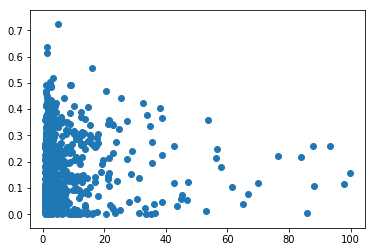

In [21]:
plt.scatter(mass,ratio)

In [17]:
a=Cold_Gas_Ratio(99,329508)

In [18]:
a

(0.067311756937977918, 775.56519)